# Assignment 1: Job Market Analysis

## Part 1 - Data Preperation and Preprocesing

In [77]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
# Importing data
df = pd.read_csv("data.csv", low_memory=False)

In [79]:
# Display head of the data
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [80]:
# Display the shape of the dataset
print("DataFrame shape:\n")
print(df.shape)

DataFrame shape:

(318477, 13)


In [81]:
# Display the datatypes of each column
print("Column datatypes:\n")
print(df.dtypes)

Column datatypes:

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object


In [82]:
# Check for null values and display them
print("NULL values:\n")
print(df.isnull().sum())

NULL values:

Id                        0
Title                     0
Company               12004
Date                      0
Location             121248
Area                 195819
Classification       121248
SubClassification    121248
Requirement               7
FullDescription       16175
LowestSalary              0
HighestSalary             0
JobType               16098
dtype: int64


In [83]:
# Simplifying date datatype
print("Change date datatype:\n")

print("Original:")
print(df['Date'][0],"\n")

# Changing date datatype
df['Date'] = df['Date'].astype('datetime64[ns]')

print("New:")
print(df['Date'][0])

Change date datatype:

Original:
2018-10-07T00:00:00.000Z 

New:
2018-10-07 00:00:00


In [84]:
# Seems like removing the IDs reveals a bunch of duplicate data so I've just commented this out for now.
""""
# Changing ID datatype

# Some IDs have not been entered correctly, eg: '37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676'
# Need to trim the first 8 characters before converting to int

df['Id'] = df['Id'].str[:8].astype('int64')
"""

'"\n# Changing ID datatype\n\n# Some IDs have not been entered correctly, eg: \'37915260&searchrequesttoken=e859cc74-e22f-498d-ac7c-77a7e1b45676\'\n# Need to trim the first 8 characters before converting to int\n\ndf[\'Id\'] = df[\'Id\'].str[:8].astype(\'int64\')\n'

In [85]:
# Remove the Id and FullDescription column
df = df.drop('Id', axis=1)
df = df.drop('FullDescription', axis=1)

In [86]:
# Removing duplicate data
print("Removing Duplicates:\n")

# Check for duplicates
print("No. of duplicates:", df[df.duplicated()].shape[0], "(before)")

# Remove duplicates:
df.drop_duplicates(inplace=True)

# Re-check for duplicates
print("No. of duplicates:", df[df.duplicated()].shape[0], "(after)")

Removing Duplicates:

No. of duplicates: 9991 (before)
No. of duplicates: 0 (after)


In [87]:
# How many jobs do we have in total?
total_jobs = df.shape[0]

# How many jobs have lowest salary equal to $0?
lowest_size = df[(df['LowestSalary'] == 0)].shape[0]

# How many jobs have highest salary equal to $999k?
highest_size = df[(df['HighestSalary'] == 999)].shape[0]

# How many jobs have both the highest and lowest salary ($0k - $999k)
both_size = df[(df['HighestSalary'] == 999) & (df['LowestSalary'] == 0)].shape[0]

print("Total jobs:", total_jobs, "\n")
      
print("Lowest $0 jobs: %d" % lowest_size)
print("(%.2f%% of jobs)\n" % (lowest_size / total_jobs * 100))
      
print("Highest $999k jobs: %d" % highest_size)
print("(%.2f%% of jobs)\n" % (highest_size / total_jobs * 100))

print("Both Lowest $0 and Highest $999k jobs: %d" % both_size)
print("(%.2f%% of jobs)" % (both_size / total_jobs * 100))

Total jobs: 308486 

Lowest $0 jobs: 60840
(19.72% of jobs)

Highest $999k jobs: 11027
(3.57% of jobs)

Both Lowest $0 and Highest $999k jobs: 0
(0.00% of jobs)


In [88]:
# Creating column for average salary
# The SEEK listing allows us to search listings from 30k -> 200k+
# Thus we will increase 0k salaries to 15k and 999k salaries to 300k to keep it closer to these amounts.

df.loc[df['LowestSalary'] == 0, 'LowestSalary'] = 15
df.loc[df['HighestSalary'] == 999, 'HighestSalary'] = 300

# Create row for average salary (Mean of Lowest and Highest salary)
df['AvgSalary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Multiply our salaries by 1000 (1 = 1k so we want 1 = 1000)
df['LowestSalary'] = df['LowestSalary'] * 1000
df['HighestSalary'] = df['HighestSalary'] * 1000
df['AvgSalary'] = df['AvgSalary'] * 1000

# Convert our AvgSalary from float -> int
df['AvgSalary'] = df['AvgSalary'].astype('Int64')

In [89]:
# See our new column
df.head(7)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,LowestSalary,HighestSalary,JobType,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,15000,30000,NaN,22500
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,15000,30000,NaN,22500
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,15000,30000,NaN,22500
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,15000,30000,NaN,22500
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",15000,30000,NaN,22500
5,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",15000,30000,NaN,22500
6,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,15000,30000,NaN,22500


In [90]:
# Remove area from titles and move to the area column
print("Number of Titles containing Area:", df['Title'].str.contains(' in ').sum())

df.loc[df['Area'].isnull(), 'Area'] = df['Title'].str.split(' in ').str[1]
df.loc[df['Title'].str.contains(' in '), 'Title'] = df['Title'].str.split(' in ').str[0]

print("Number of Titles containing Area:", df['Title'].str.contains(' in ').sum())

Number of Titles containing Area: 12093
Number of Titles containing Area: 0


In [91]:
# move JobType column up the dataframe so that all the salaries are together
cols = list(df)
cols.insert(8, cols.pop(cols.index('JobType')))
df = df.loc[:, cols]
df.head()

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,15000,30000,22500
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,15000,30000,22500
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,15000,30000,22500
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,15000,30000,22500
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,15000,30000,22500


In [92]:
# We don't need to run this code here BUT we will filter out NaN values when we are analysing a specific factor
# e.g. When we are looking at Location, we can remove all the NaN location values just for that.


# df = df.dropna(subset='Location', axis = 0, how ='any')


In [93]:
# Normalising the data
df_norm = df.copy() # Create a copy of the DataFrame that will be using normalized values

columns_to_normalize = ['LowestSalary','HighestSalary','AvgSalary'] # Normalize our columns with int values

scaler = StandardScaler() # Declare the standard scaler for normalizing
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize]) # Fit and transform our data

In [94]:
# See our new normalized data
df_norm

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary
0,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,-1.126220,-0.920415,-1.011335
1,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,-1.126220,-0.920415,-1.011335
2,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,-1.126220,-0.920415,-1.011335
3,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,-1.126220,-0.920415,-1.011335
4,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,-1.126220,-0.920415,-1.011335
...,...,...,...,...,...,...,...,...,...,...,...,...
318472,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,2.775087,3.296111,3.084672
318473,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,2.775087,3.296111,3.084672
318474,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,2.775087,3.296111,3.084672
318475,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,2.775087,3.296111,3.084672


### Dataset overview
< Will copy paste from documentation >

### Data preperation and preprosessing
< Will copy paste from documentation >

### Hypothesis
< Will copy paste from documentation >



## Part 2 - Data Analysis and Interpretation

### Job metadata
Extract the relevant information to describe the job’s
attributes.
For example:
- What is the sector, sub-sector of each job?
- Where is the location of the job?
- Which is the range of salaries for each job?

In [95]:
df.head(0)

,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,JobType,LowestSalary,HighestSalary,AvgSalary


In [96]:
# How is the data spread out across all job types?
df['Classification'].value_counts()

Information & Communication Technology    22683
Trades & Services                         17910
Healthcare & Medical                      16991
Hospitality & Tourism                     15483
Manufacturing, Transport & Logistics      12324
Administration & Office Support            9987
Accounting                                 9340
Education & Training                       9131
Construction                               8339
Sales                                      8076
Retail & Consumer Products                 8006
Government & Defence                       7191
Engineering                                6426
Mining, Resources & Energy                 6258
Banking & Financial Services               4616
Community Services & Development           4452
Legal                                      4221
Human Resources & Recruitment              4112
Marketing & Communications                 3959
Call Centre & Customer Service             3947
Real Estate & Property                  

In [97]:
# IT jobs
df_IT = df['SubClassification'].loc[df['Classification'] == 'Information & Communication Technology']

# What is the spread of IT job listings?
df_IT.value_counts()

Developers/Programmers                   4189
Business/Systems Analysts                2958
Programme & Project Management           2400
Architects                               1540
Engineering - Software                   1429
Help Desk & IT Support                   1371
Networks & Systems Administration        1190
Consultants                              1145
Other                                     996
Testing & Quality Assurance               827
Security                                  772
Management                                745
Engineering - Network                     550
Database Development & Administration     548
Web Development & Production              452
Sales - Pre & Post                        444
Product Management & Development          376
Telecommunications                        353
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          96
Computer Operators                

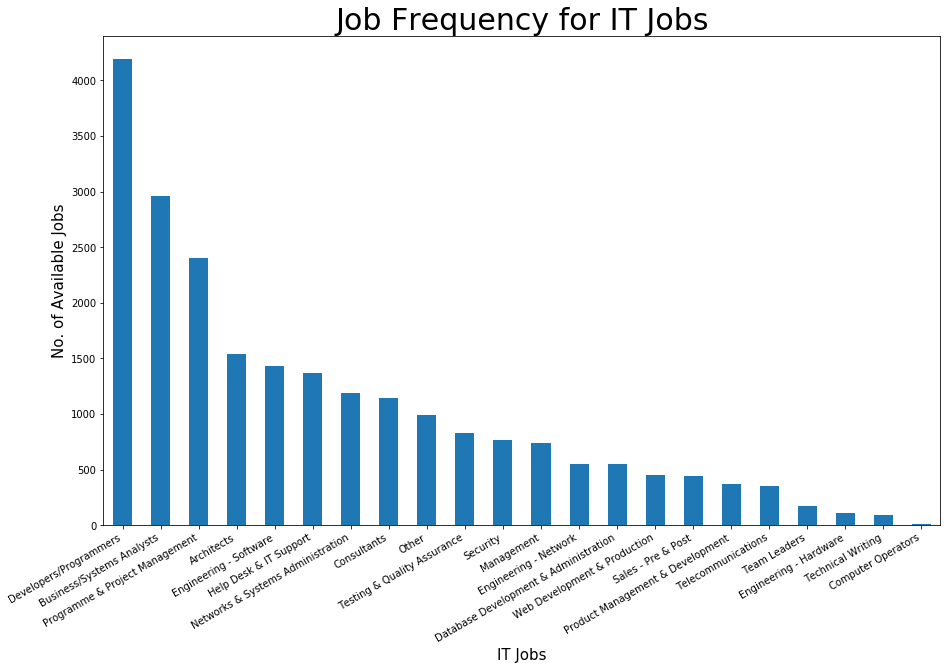

In [98]:
# Histogram that shows the frequency of IT jobs
f, ax = plt.subplots(figsize=(15, 10))
df_IT.value_counts().head(25).plot(ax=ax, kind='bar')
f.autofmt_xdate()
plt.title("Job Frequency for IT Jobs", fontsize=30)
plt.ylabel("No. of Available Jobs", fontsize=15)
plt.xlabel("IT Jobs", fontsize=15)
plt.show()

In [99]:
# Where are these IT jobs located?

In [100]:
# What is the range of salaries for these IT jobs?

#### Interesting points about metadata so far:
- IT jobs are the most frequently listed.
- Among IT jobs, Developers/Programmers are the most popular

### Market by location
For example:
- What is the market size in each city? Which are the hottest job sectors in
each city?
- Which range of salary is common in each city? Where are the employees
more well-paid?
- Can you detect the pattern of posting: e.g. are more jobs posted at the
beginning of month?

In [101]:
# How is the data spread out across locations?
df['Location'].value_counts()

Sydney                                  60374
Melbourne                               46428
Brisbane                                21335
Perth                                   13138
Adelaide                                 6606
                                        ...  
Yorke Peninsula & Clare Valley             94
Tumut, Snowy & Monaro                      86
Somerset & Lockyer                         65
Fleurieu Peninsula & Kangaroo Island       64
Central & South East TAS                   57
Name: Location, Length: 65, dtype: int64

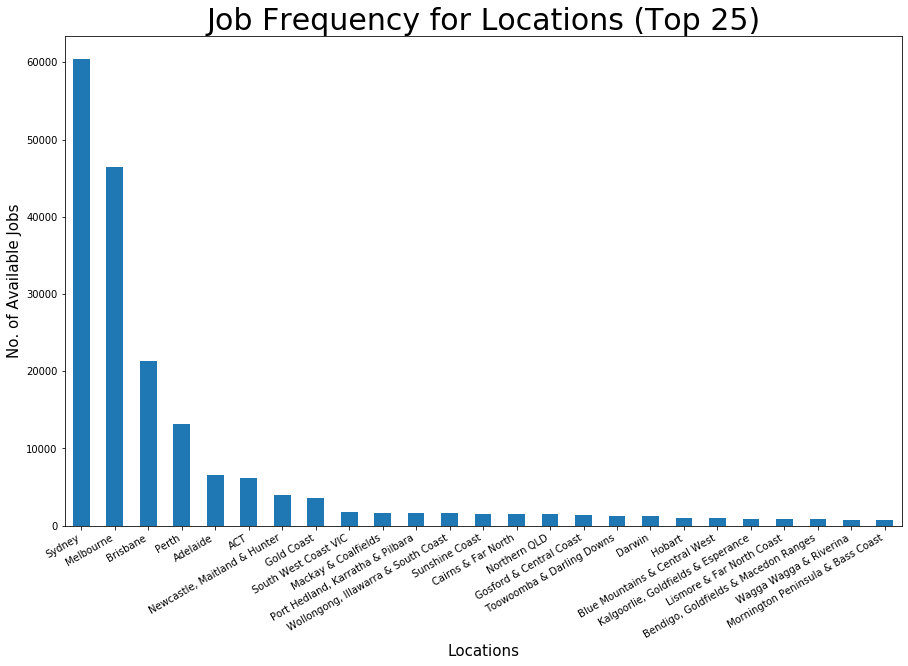

In [102]:
# Histogram that shows the frequency of jobs in locations
f, ax = plt.subplots(figsize=(15, 10))
df['Location'].value_counts().head(25).plot(ax=ax, kind='bar')
f.autofmt_xdate()
plt.title("Job Frequency for Locations (Top 25)", fontsize=30)
plt.ylabel("No. of Available Jobs", fontsize=15)
plt.xlabel("Locations", fontsize=15)
plt.show()

Text(0.5, 0, 'Locations')

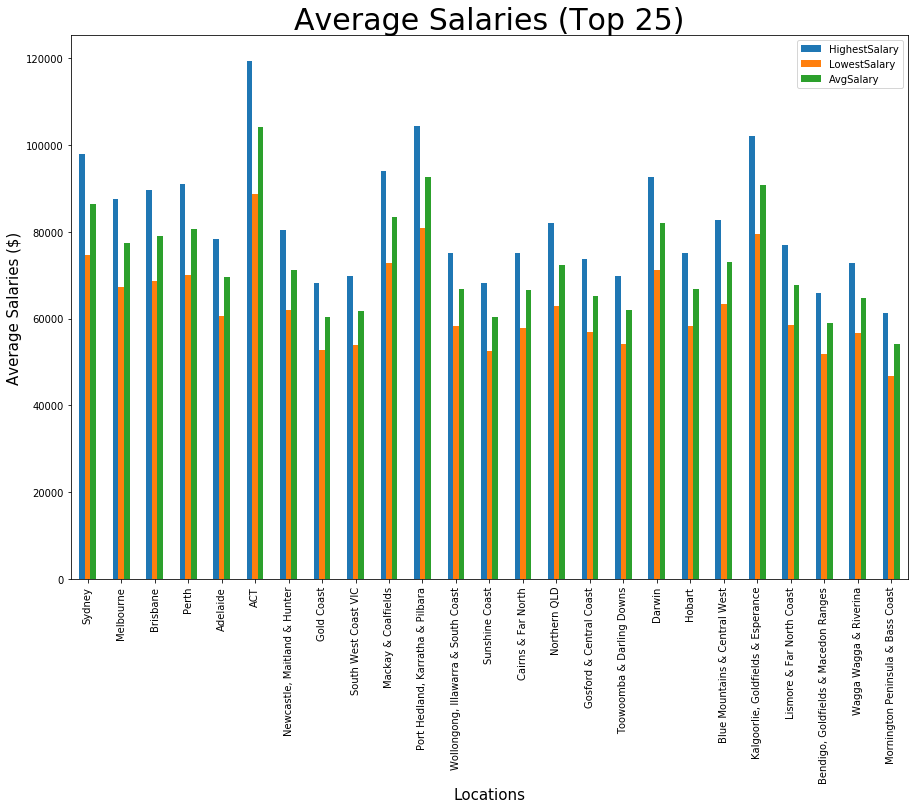

In [103]:
# - A histogram that shows mean(AverageSalary) for each location

top25loc = df['Location'].value_counts().head(25).index.tolist()
top25avgsal = []
top25highsal = []
top25lowsal = []

for x in top25loc:
    temp = (df[df['Location'] == x])
    top25avgsal.append(temp['AvgSalary'].mean())
    top25highsal.append(temp['HighestSalary'].mean())
    top25lowsal.append(temp['LowestSalary'].mean())
    
data = {'Location': top25loc, 'HighestSalary': top25highsal,
        'LowestSalary': top25lowsal, 'AvgSalary': top25avgsal} 
df_sal = pd.DataFrame (data, columns = ['Location', 'HighestSalary', 'LowestSalary', 'AvgSalary'])

df_sal.plot(kind='bar', figsize = (15,10))
plt.title("Average Salaries (Top 25)", fontsize=30)
plt.xticks(np.arange(25), top25loc)
plt.ylabel("Average Salaries ($)", fontsize=15)
plt.xlabel("Locations", fontsize=15)

In [104]:
# Create dataframe for date/posting trends
dates_df = df.filter(['Date'], axis=1)
dates_df['Date'] = dates_df['Date'].astype('datetime64[ns]')
dates_df['day'] = df['Date'].dt.day
dates_df['month'] = df['Date'].dt.month
dates_df['year'] = df['Date'].dt.year
dates_df = dates_df.drop('Date', axis=1)
dates_df.head()

,day,month,year
0,7,10,2018
1,7,10,2018
2,7,10,2018
3,7,10,2018
4,7,10,2018


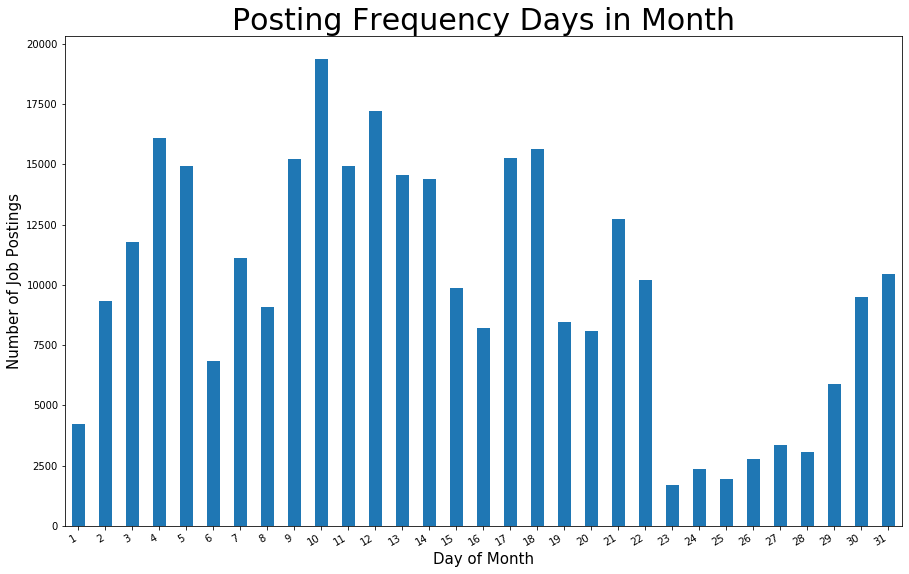

In [105]:
# Histogram that shows the frequency of jobs in locations

f, ax = plt.subplots(figsize=(15, 10))
# dates_df['day'].value_counts().plot(ax=ax, kind='bar')
dates_df.groupby("day")['day'].value_counts().plot(kind='bar')
f.autofmt_xdate()
plt.title("Posting Frequency Days in Month", fontsize=30)
plt.ylabel("Number of Job Postings", fontsize=15)
plt.xticks(np.arange(31), [x for x in range(1,32)])
plt.xlabel("Day of Month", fontsize=15)
plt.show()


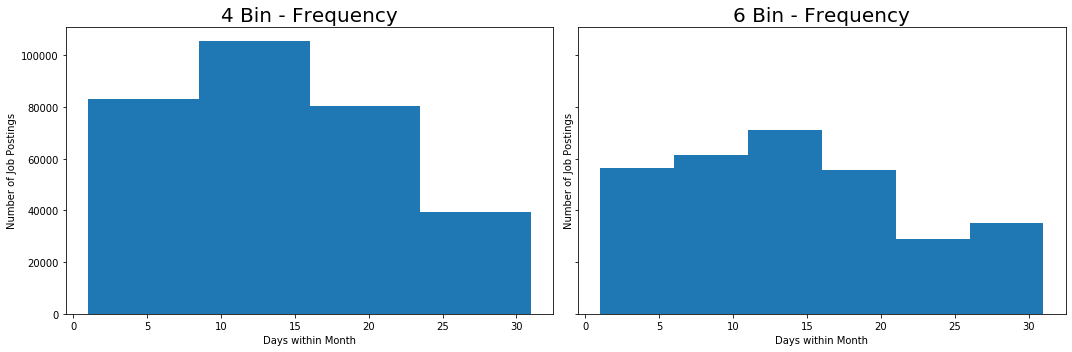

In [106]:
# def group_by_third(d):
#     if d['day'] <= 10:
#         return 'first'
#     elif d['day'] <= 20:
#         return 'second'
#     else:
#         return 'third'

# dates_df['third'] = dates_df.apply(group_by_third, axis=1)

fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, tight_layout=True)
axs[0].hist(dates_df['day'], bins=4)
axs[0].set_title('4 Bin - Frequency', fontsize=20)
axs[0].set_xlabel('Days within Month')
axs[0].set_ylabel('Number of Job Postings')
axs[1].hist(dates_df['day'], bins=6)
axs[1].set_title('6 Bin - Frequency', fontsize=20)
axs[1].set_xlabel('Days within Month')
axs[1].set_ylabel('Number of Job Postings')
plt.show()


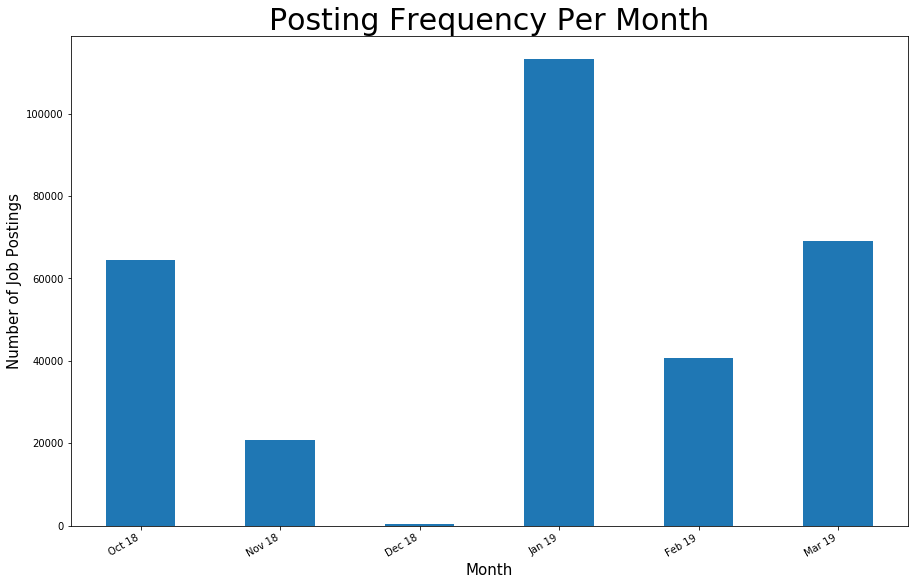

In [107]:
# Histogram that shows the frequency of jobs in locations
f, ax = plt.subplots(figsize=(15, 10))
# dates_df['month'].value_counts().plot(ax=ax, kind='bar')
dates_df.groupby("month")['month'].value_counts().plot(kind='bar')
f.autofmt_xdate()
plt.title("Posting Frequency Per Month", fontsize=30)
plt.ylabel("Number of Job Postings", fontsize=15)
plt.xticks(np.arange(6), ['Oct 18', 'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19'])
plt.xlabel("Month", fontsize=15)
plt.show()

In [108]:
# Heat map

# Correlation
# pd.plotting.scatter_matrix(df_norm, alpha=0.2, figsize=(10,10))
# plt.show()

# yeah not sure about that one...

In [109]:
# Regression test

### Market by sectors
For example:
- Which sectors keep the highest market share?
- In each sector, which sub-sectors are the main spotlights?
- What is the salary range for each sector/sub-sector? Can you compare salary
range between sectors/subsectors?
- What is the trending of market i.e. if a high school student ask you which
subject should he/she learn in the university (to guarantee a job in a future),
what is your advice?
- Can you detect which skills are required in each sector?

## Part 3 - Evaluation